# Experiments on T-Maze

All of these are trained on network of depth 10, width 10 and $\gamma=0.98$. There is no feature generation.

The agent get -0.1 reward when the state does not change (i.e. when it bumps into a wall). It gets +4 reward for predicting correctly at junction and -4 for predicting incorrectly.

In [1]:
import mariadb
import sys
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import os

# JupyterLab renderer support
#jupyter labextension install jupyterlab-plotly@4.14.3

# OPTIONAL: Jupyter widgets extension
#jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.14.3

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(
rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'black',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'xtick.bottom': False,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})
plt.rcParams["figure.figsize"] = (10,7)
sns.set_context("notebook", rc={"font.size":20,
                                "axes.titlesize":20,
                                "axes.labelsize":15})

#CB91_Blue = '#2CBDFE'
#CB91_Green = '#47DBCD'
#CB91_Pink = '#F3A0F2'
#CB91_Purple = '#9D2EC5'
#CB91_Violet = '#661D98'
#CB91_Amber = '#F5B14C'
#color_list = [CB91_Purple, CB91_Blue, CB91_Pink, CB91_Green,
#              CB91_Amber, CB91_Violet]
#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

In [3]:
class DbAccessor:
    def __init__(self, db_name, cfg_primary_key="run", timestep_col_name="episode"):
        #params:
        #    cfg_primary_key: the key that is used to index the runs
        #    timestep_col_name: the column which contains the timestep values to be used in plots (or any other column to index with/use as x-axis)
        self.cfg_primary_key = cfg_primary_key
        self.timestep_col_name = timestep_col_name
        try:
            self.conn = mariadb.connect(user='hshah1',
                                        password=os.environ['cedarsqlpswd'],
                                        host='127.0.0.1',
                                        port=3307,
                                        database=db_name)
        except mariadb.Error as e:
            print(f"Error connecting to MariaDB Platform: {e}")
            sys.exit(1)

    def get_table_list(self):
        return pd.read_sql('show tables', self.conn)
    
    def get_table(self, table_name, cfg_filter=None, column_names="*", index=True):
        #params:
        #    cfg_filter: optional value of <cfg_primary_key> to filter the results with
        #    column_names: can be multiple
        #    index: whether the current table is indexed by <timestep_col_name>
        #returns:
        #    <timestep_col_name>'s values + <column_names>'s values
        
        #TODO careful with column names in future...
        if index:
            if column_names != "*":
                column_names += f',{self.timestep_col_name}'

            if cfg_filter:
                return pd.read_sql(f'SELECT {column_names} FROM {table_name} WHERE {self.cfg_primary_key}={cfg_filter}', self.conn).set_index(self.timestep_col_name)
            else:
                return pd.read_sql(f'SELECT {column_names} FROM {table_name}', self.conn).set_index(self.timestep_col_name)            
        else:
            if cfg_filter:
                return pd.read_sql(f'SELECT {column_names} FROM {table_name} WHERE {self.cfg_primary_key}={cfg_filter}', self.conn)
            else:
                return pd.read_sql(f'SELECT {column_names} FROM {table_name}', self.conn)


In [4]:
db = DbAccessor('hshah1_tmaze_prelim')
db.get_table('runs', index=False)

,add_features,comment,data_driven_initialization,epsilon,features_acc_thresh,features_min_timesteps,gamma,max_episodes,name,num_layers,num_new_features,run,seed,sparsity,step_size,steps,tmaze_corridor_length,width
0,false,sweep,false,0.05,0.9,100000,0.98,400000,tmaze_prelim,10,5,0,1,0,3e-5,3500000,2,10
1,false,sweep,false,0.05,0.9,100000,0.98,400000,tmaze_prelim,10,5,1,2,0,3e-5,3500000,2,10
2,false,sweep,false,0.05,0.9,100000,0.98,400000,tmaze_prelim,10,5,2,3,0,3e-5,3500000,2,10
3,false,sweep,false,0.05,0.9,100000,0.98,400000,tmaze_prelim,10,5,3,4,0,3e-5,3500000,2,10
4,false,sweep,false,0.05,0.9,100000,0.98,400000,tmaze_prelim,10,5,4,5,0,3e-5,3500000,2,10
5,false,sweep,false,0.05,0.9,100000,0.98,400000,tmaze_prelim,10,5,5,1,0,3e-5,3500000,3,10
6,false,sweep,false,0.05,0.9,100000,0.98,400000,tmaze_prelim,10,5,6,2,0,3e-5,3500000,3,10
7,false,sweep,false,0.05,0.9,100000,0.98,400000,tmaze_prelim,10,5,7,3,0,3e-5,3500000,3,10
8,false,sweep,false,0.05,0.9,100000,0.98,400000,tmaze_prelim,10,5,8,4,0,3e-5,3500000,3,10
9,false,sweep,false,0.05,0.9,100000,0.98,400000,tmaze_prelim,10,5,9,5,0,3e-5,3500000,3,10


In [5]:
db.get_table('run_states', index=False)

,run,run_state,run_state_comments
0,0,finished,
1,1,finished,
2,2,finished,
3,3,finished,
4,4,killed,nan_prediction
5,5,finished,
6,6,finished,
7,7,finished,
8,8,finished,
9,9,finished,


# T-Maze len 2

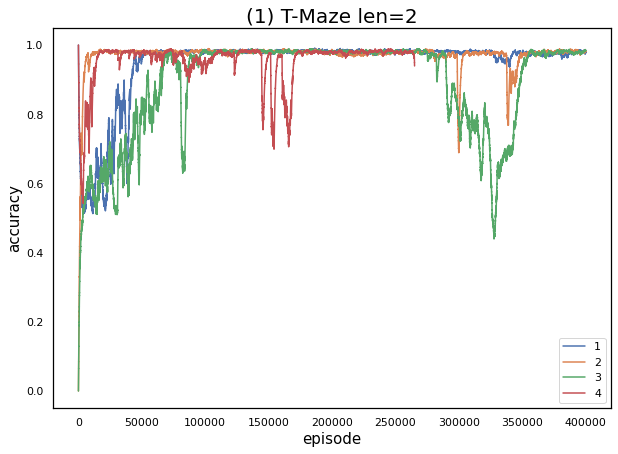

In [6]:
plt.title('(1) T-Maze len=2')
plt.xlabel('episode')
plt.ylabel('accuracy')
for k in range(1,5):
    plt.plot(db.get_table('episodic_metrics', k, 'accuracy'), label=k)
plt.legend()
plt.show()

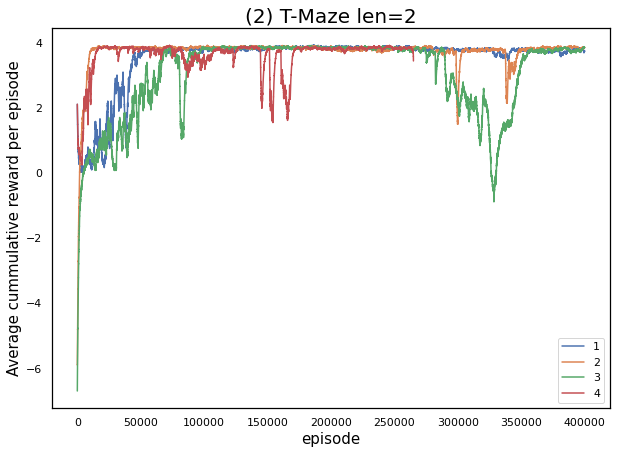

In [7]:
plt.title('(2) T-Maze len=2')
plt.xlabel('episode')
plt.ylabel('Average cummulative reward per episode')
for k in range(1,5):
    plt.plot(db.get_table('episodic_metrics', k, 'avg_reward'), label=k)
plt.legend()
plt.show()

# T-Maze len 3

#### Note that one of the runs below got nans (purple one)

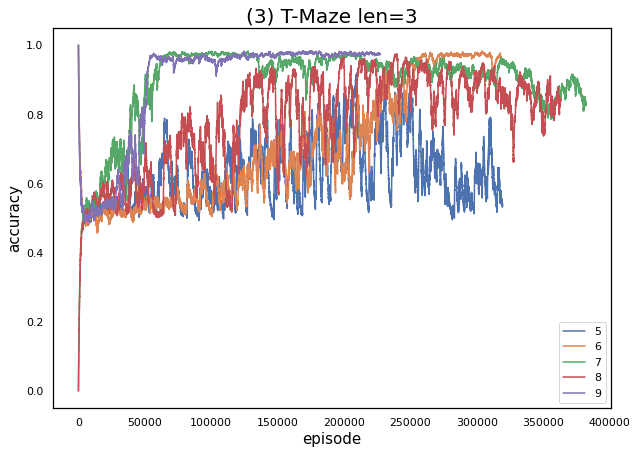

In [8]:
plt.title('(3) T-Maze len=3')
plt.xlabel('episode')
plt.ylabel('accuracy')
for k in range(5,10):
    plt.plot(db.get_table('episodic_metrics', k, 'accuracy'), label=k)
plt.legend()
plt.show()

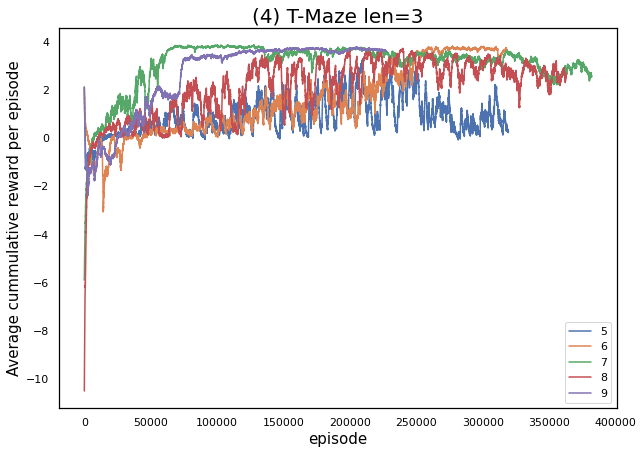

In [9]:
plt.title('(4) T-Maze len=3')
plt.xlabel('episode')
plt.ylabel('Average cummulative reward per episode')
for k in range(5,10):
    plt.plot(db.get_table('episodic_metrics', k, 'avg_reward'), label=k)
plt.legend()
plt.show()

# T-Maze len 4

#### There is an upper limit of 3.5M timesteps on each run. The episodes were too long in majority of the seeds and thus they ended without being able to finish many episodes.

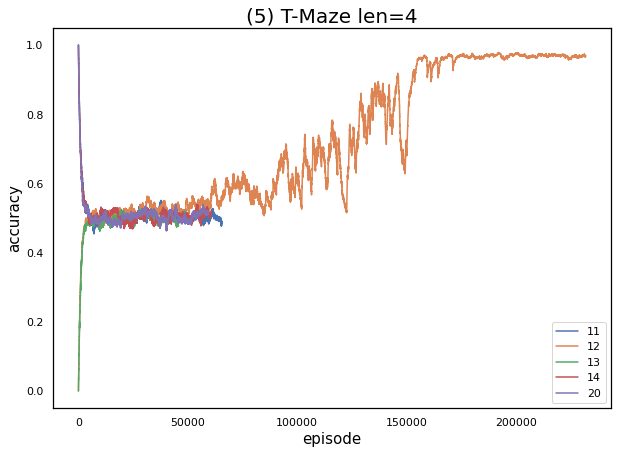

In [10]:
plt.title('(5) T-Maze len=4')
plt.xlabel('episode')
plt.ylabel('accuracy')
for k in [11,12,13,14,20]:
    plt.plot(db.get_table('episodic_metrics', k, 'accuracy'), label=k)
plt.legend()
plt.show()

#### Note how the ones below have negative average cummulative rewards per episode. This means that the agent keeps crashing into walls, thereby prolonging the episodes.

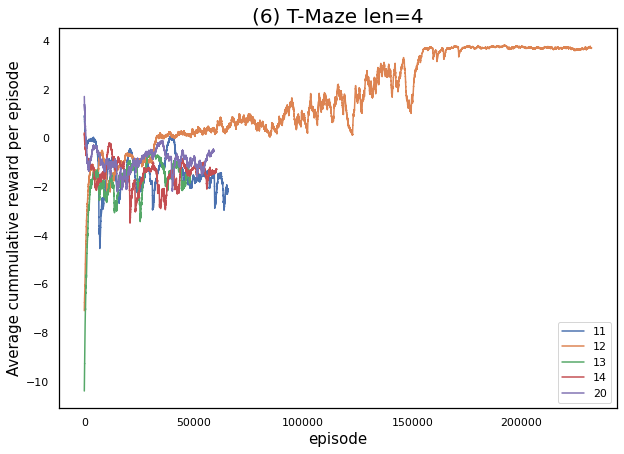

In [11]:
plt.title('(6) T-Maze len=4')
plt.xlabel('episode')
plt.ylabel('Average cummulative reward per episode')
for k in [11,12,13,14,20]:
    plt.plot(db.get_table('episodic_metrics', k, 'avg_reward'), label=k)
plt.legend()
plt.show()

# T-Maze len 5

#### Note the x-axis range. Same story as before.

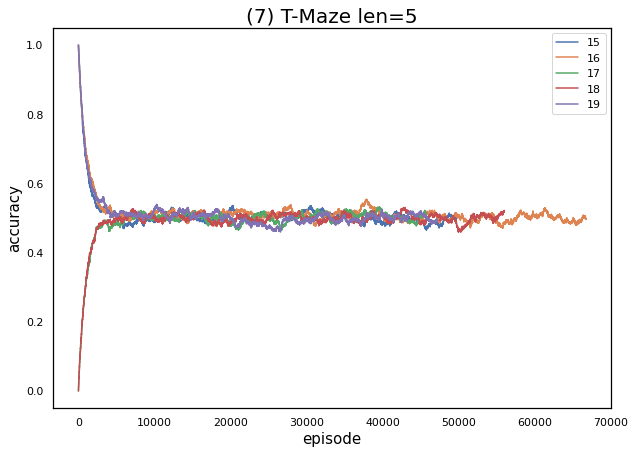

In [12]:
plt.title('(7) T-Maze len=5')
plt.xlabel('episode')
plt.ylabel('accuracy')
for k in range(15,20):
    plt.plot(db.get_table('episodic_metrics', k, 'accuracy'), label=k)
plt.legend()
plt.show()

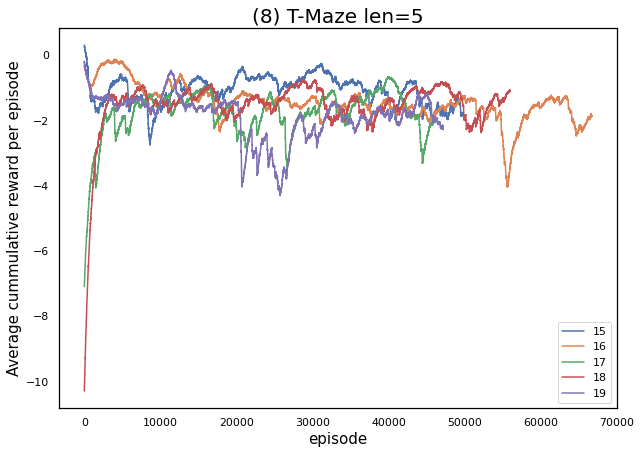

In [13]:
plt.title('(8) T-Maze len=5')
plt.xlabel('episode')
plt.ylabel('Average cummulative reward per episode')
for k in range(15,20):
    plt.plot(db.get_table('episodic_metrics', k, 'avg_reward'), label=k)
plt.legend()
plt.show()